# Building an Image Classification Model

**Dataset:** CIFAR-10 **[Loading using TensorFlow]**

Implement the CNN model for classifying CIFAR-10 image dataset by dividing the model into following 4 stages:
1. Loading and preprocessing the image data
2. Defining the model's architecture
3. Training the model
4. Estimating the model's performance

### Import Necessary Packages

Import the necessary libraries for building and training the model:
- **NumPy** for numerical operations.
- **Matplotlib** for plotting the training curves.
- **TensorFlow / Keras** for creating and training the neural network model.

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### 1. Loading and Preprocessing the Image Data

- The CIFAR-10 dataset contains 60,000 32x32 RGB images in 10 classes.
- We normalize the images to be in the range [0, 1] and reshape them for use in the CNN.

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


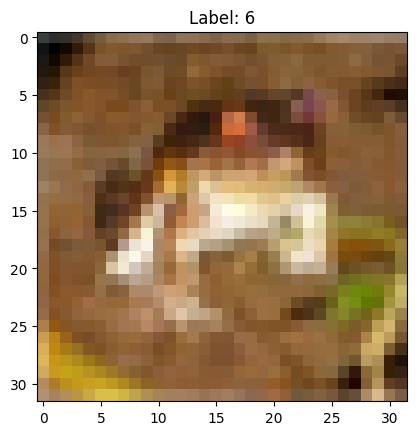

In [2]:
# Load CIFAR-10 dataset (images and labels)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to be in the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Check the shape of the training data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Display a sample image
plt.imshow(x_train[0])
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

### 2. Defining the Model's Architecture

The model consists of:
1. **Two convolutional layers** with ReLU activation and max-pooling to reduce the spatial dimensions of the feature maps.
2. **A flatten layer** to reshape the output into a 1D vector.
3. **Fully connected layers (dense layers)** for classification, with a softmax output layer for the 10 classes.

We use the Adam optimizer and categorical cross-entropy loss.

In [3]:
# Create a sequential model
model = Sequential()

# Add first convolutional layer (32 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add max pooling layer (2x2 pool size)
model.add(MaxPooling2D((2, 2)))

# Add second convolutional layer (64 filters, 3x3 kernel, ReLU activation)
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layer (2x2 pool size)
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D output to 1D
model.add(Flatten())

# Add fully connected (dense) layers
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (one for each class)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training the Model

Train the model using the training data (`x_train` and `y_train`) for 10 epochs with a batch size of 128. The model's performance is monitored using the validation data (`x_test` and `y_test`).

In [4]:
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=10, 
                    validation_data=(x_test, y_test), 
                    verbose=2)

Epoch 1/10
391/391 - 12s - 29ms/step - accuracy: 0.4427 - loss: 1.5409 - val_accuracy: 0.5272 - val_loss: 1.3223
Epoch 2/10
391/391 - 10s - 25ms/step - accuracy: 0.5716 - loss: 1.2222 - val_accuracy: 0.5922 - val_loss: 1.1882
Epoch 3/10
391/391 - 10s - 25ms/step - accuracy: 0.6189 - loss: 1.0903 - val_accuracy: 0.6353 - val_loss: 1.0622
Epoch 4/10
391/391 - 10s - 25ms/step - accuracy: 0.6580 - loss: 0.9906 - val_accuracy: 0.6499 - val_loss: 1.0089
Epoch 5/10
391/391 - 10s - 27ms/step - accuracy: 0.6804 - loss: 0.9227 - val_accuracy: 0.6662 - val_loss: 0.9685
Epoch 6/10
391/391 - 11s - 27ms/step - accuracy: 0.6995 - loss: 0.8693 - val_accuracy: 0.6715 - val_loss: 0.9659
Epoch 7/10
391/391 - 10s - 26ms/step - accuracy: 0.7183 - loss: 0.8157 - val_accuracy: 0.6783 - val_loss: 0.9452
Epoch 8/10
391/391 - 10s - 27ms/step - accuracy: 0.7326 - loss: 0.7776 - val_accuracy: 0.6890 - val_loss: 0.9170
Epoch 9/10
391/391 - 10s - 26ms/step - accuracy: 0.7455 - loss: 0.7319 - val_accuracy: 0.6886 - 

### 4. Estimating the Model's Performance

We evaluate the model on the test dataset (`x_test` and `y_test`). We then plot the training and validation accuracy and loss curves to visualize the model's performance over time.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7042 - loss: 0.8873
Test accuracy: 69.81%


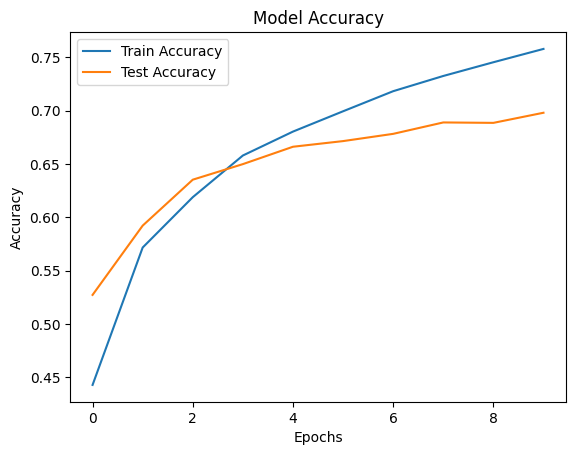

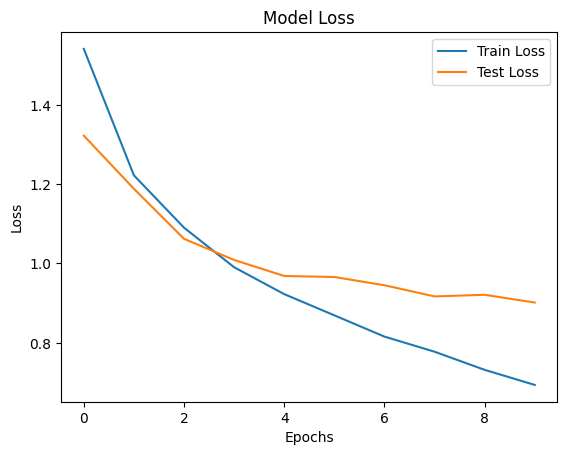

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Visualize Model Prediction on a Single Test Image

Make a prediction on one of the test images from the CIFAR-10 dataset and visualize the result:

1. **Prediction**: We use the trained model to predict the class probabilities for a specific test image.
2. **Image Display**: The selected test image is displayed to provide visual context.
3. **Class Label Output**: We identify and print the predicted class label with the highest probability, mapped to its corresponding class name in CIFAR-10.

This helps in validating the model's predictions visually, ensuring the output matches our expectations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


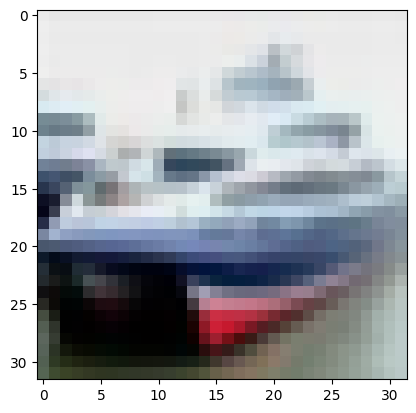

Predicted label: ship


In [6]:
# Make a prediction on a single test image
predicted_value = model.predict(x_test)

# Visualize the test image
plt.imshow(x_test[1])
plt.show()

# Print the predicted class label for the image
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted label:", class_names[np.argmax(predicted_value[1], axis=0)])